### LangGraph (mini-graf stanów)


In [1]:
!pip install -q langgraph langchain langchain-openai python-dotenv


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

from typing import TypedDict

from langgraph.graph import StateGraph, END


### Definicja stanu

In [3]:
# State to słownik, w którym przechowujemy dane między węzłami
class State(TypedDict):
    x: int


### Definicja węzłów

In [4]:
def add_one(state: State) -> State:
    return {"x": state["x"] + 1}

def multiply_two(state: State) -> State:
    return {"x": state["x"] * 2}

def finish(state: State) -> State:
    print(f"Wynik końcowy: {state['x']}")
    return state


### Budowa grafu

In [5]:
# Tworzymy graf
graph = StateGraph(State)

# Dodajemy węzły
graph.add_node("A", add_one)
graph.add_node("B", multiply_two)
graph.add_node("C", finish)

# Określamy przepływ
graph.set_entry_point("A")   # start w A
graph.add_edge("A", "B")     # A → B
graph.add_edge("B", "C")     # B → C
graph.add_edge("C", END)     # zakończenie


### Kompilacja i uruchomienie

In [6]:
# Kompilujemy graf do aplikacji
app = graph.compile()

# Uruchamiamy z początkowym stanem
app.invoke({"x": 2})


Wynik końcowy: 6


{'x': 6}

### Wizualizacja grafu

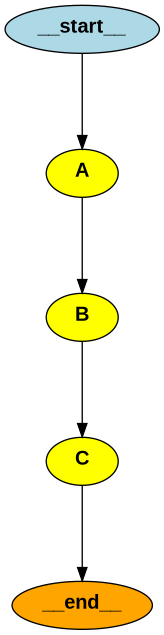

In [7]:
# Rysujemy schemat
from IPython.display import Image, display

png_bytes = app.get_graph().draw_png()
display(Image(png_bytes))
